Rafał Nowak
# Visualization of CIFAR10 dataset

In [ ]:
#import logging
#logging.basicConfig(level=logging.DEBUG)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load CIFAR10 dataset

In [5]:
# -*- coding: utf-8 -*-
# File: myutils.py
# Author: Rafał Nowak <rafal.nowak@cs.uni.wroc.pl>

import os
import logging
import tarfile
import urllib.request
import pickle
import numpy as np

# pylint:

CIFAR_DATA_URL = 'http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
CIFAR_DIR_PATH = './cifar10_data/'
CIFAR_FOLDERNAME = 'cifar-10-batches-py'
CIFAR_BATCH_SIZE = 10000  # CIFAR10 data are split into blocks of 10000 images

CIFAR_TRAINING_FILENAMES = [
    os.path.join(CIFAR_DIR_PATH, CIFAR_FOLDERNAME, 'data_batch_%d' % i) for i in range(1, 6)
    ]
CIFAR_TESTING_FILENAMES = [os.path.join(CIFAR_DIR_PATH, CIFAR_FOLDERNAME, 'test_batch')]

def read_CIFAR_files(filenames):
    """
    Return the CIFAR dataset loaded from the bunch of files.

    Keyword arguments:
    filenames -- the list of filenames (strings)
    """
    dataset = [] # dataset to be returned
    for file in filenames:
        with open(file, 'rb') as fo:
            _dict = pickle.load(fo, encoding='bytes')

        # Loaded in this way, each of the batch files contains a dictionary
        # with the following elements:
        data = _dict[b'data']
        labels = _dict[b'labels']
        #   data -- a 10000x3072 numpy array of uint8s.
        #           Each row of the array stores a 32x32 colour image.
        #           The first 1024 entries contain the red channel values,
        #           the next 1024 the green, and the final 1024 the blue.
        #           The image is stored in row-major order, so that the
        #           first 32 entries of the array are the red channel values
        #           of the first row of the image.
        #   labels -- a list of 10000 numbers in the range 0-9. The number
        #           at index i indicates the label of the ith image in the
        #           array data.

        # data[0] is the first image, data[1] is second and so on
        assert data[0].size == 3*32*32

        for k in range(CIFAR_BATCH_SIZE):
            # pick k-th image
            image = data[k].reshape(3, 32, 32)
            # image[ C, x, y ] where C means the color
            # image[ :, x, y ] is array [ R,G,B ]
            #        0  1  2
            # Since we want to transpose image to have image[x,y,:]
            #                                                1 2 0
            image = np.transpose(image, [1, 2, 0])
            # img[x,y,:] is array [R,G,B]
            dataset.append([image, labels[k]])
    return dataset

def load_CIFAR_classnames():
    """Return the names of consecutive classes in CIFAR10 database"""
    return ['plane','auto','bird','cat','deer','dog','frog','horse','ship','truck']

def load_CIFAR_dataset(shuffle=True):
    """
    Download (if necessary) CIFAR database file and extract it.
    Return the tuple of training and testing dataset.
    """
    logging.info("Loading dataset ...")
    # checking if the data is already in the folder
    if not os.path.isdir(os.path.join(CIFAR_DIR_PATH, CIFAR_FOLDERNAME)):
        # if not, we download the data
        os.makedirs(CIFAR_DIR_PATH, exist_ok=True) # create folder for the data
        filename = CIFAR_DATA_URL.split('/')[-1]
        filepath = os.path.join(CIFAR_DIR_PATH, filename)
        # try to download the file
        try:
            import sys
            def _progress(cnt,blck_size,total_size):
                sys.stdout.write('\r>> Downloading file %s (%3.1f%%)' % (filename, 100.0*cnt*blck_size/total_size))
                sys.stdout.flush()
            logging.info("Downloading file {f}".format(f=CIFAR_DATA_URL))
            fpath, _ = urllib.request.urlretrieve(CIFAR_DATA_URL, filepath, reporthook=_progress)
            statinfo = os.stat(fpath)
            size = statinfo.st_size
        except:
            logging.error("Failed to download {f}".format(f=CIFAR_DATA_URL))
            raise

        print('Succesfully downloaded {f} ({s} bytes)'.format(f=filename,s=size))
        tarfile.open(filepath, 'r:gz').extractall(CIFAR_DIR_PATH)

    trainingData = read_CIFAR_files(CIFAR_TRAINING_FILENAMES)
    testingData = read_CIFAR_files(CIFAR_TESTING_FILENAMES)

    if shuffle:
        logging.info("Shuffling data ...")
        import sklearn
        trainingData = sklearn.utils.shuffle(trainingData)
        testingData = sklearn.utils.shuffle(testingData)

    return trainingData, testingData




In [6]:

data_training, data_testing = load_CIFAR_dataset(shuffle=False)

n_training = len( data_training )
n_testing = len( data_testing )
print('Loaded CIFAR10 database with {} training and {} testing samples'.format(n_training, n_testing))

>> Downloading file cifar-10-python.tar.gz (100.0%)Succesfully downloaded cifar-10-python.tar.gz (170498071 bytes)
Loaded CIFAR10 database with 50000 training and 10000 testing samples


## Some examples from each class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


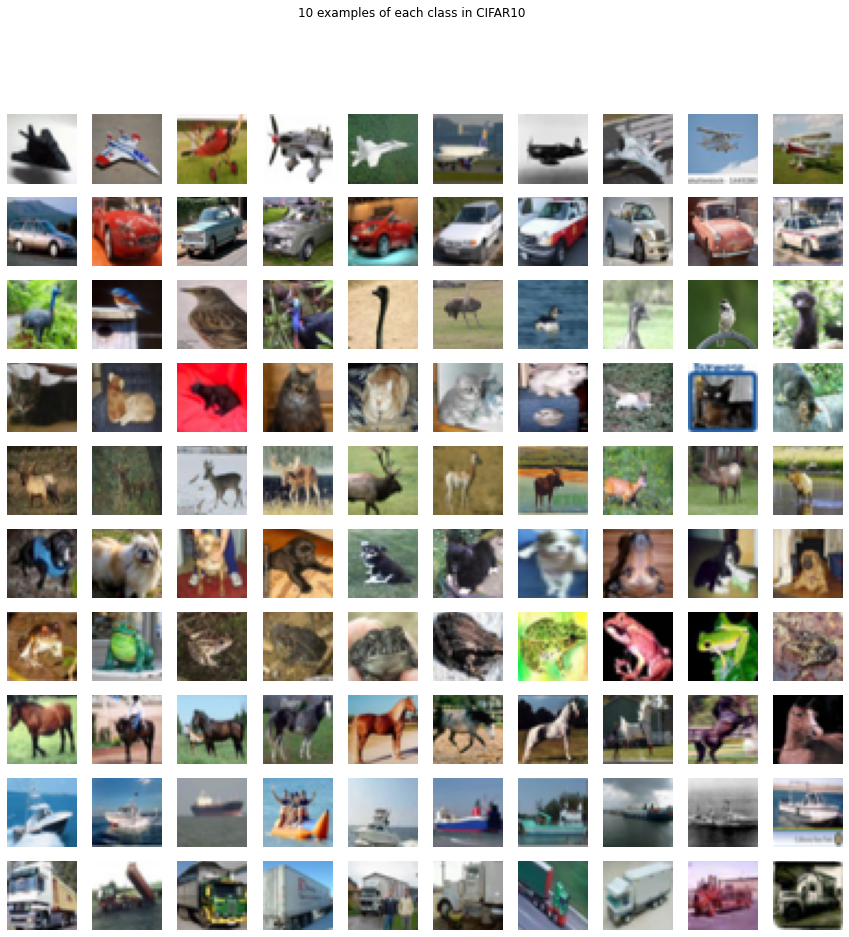

In [7]:
nclasses  = 10 # number of classes to visualize
nexamples = 10 # number of examples for each class

# Chosing indices from training set images
training_labels = np.array( data_training )[:,1]
img_idx = [ np.where(training_labels==class_id)[0][0:nexamples] for class_id in range(nclasses)  ]
        
# Creating plot with subplots
fig, axarr = plt.subplots(nclasses,nexamples,figsize=(15,15))
for class_id in range(nclasses):
    for i in range(nexamples):
        axarr[class_id,i].imshow(data_training[img_idx[class_id][i]][0])
        axarr[class_id,i].axis('off')

fig.suptitle('{} examples of each class in CIFAR10'.format(nexamples))
class_names = load_CIFAR_classnames()

#TODO: add class names to the plot

plt.show()

## Training data decomposition to 2D

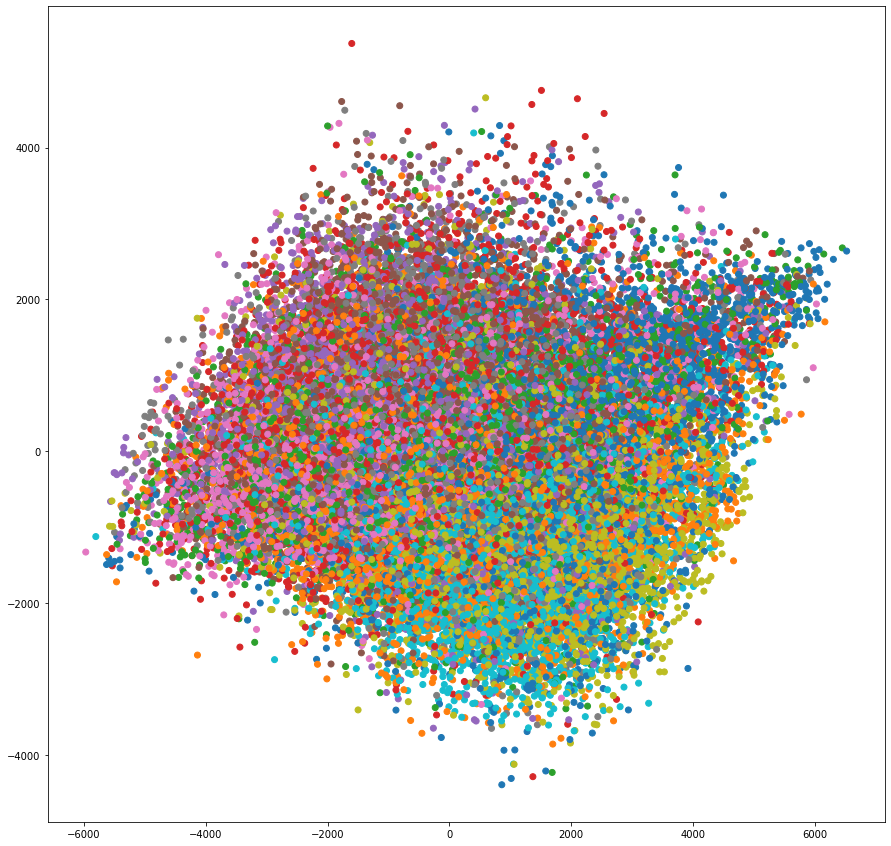

In [8]:
nsamples = 50000
features = np.array( [ data_training[i][0].flatten() for i in range(nsamples)] )
labels   = np.array( [ data_training[i][1] for i in range(nsamples)])

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(features)

X = pca.transform(features)

from matplotlib import pyplot as plt
plt.figure( figsize=(15,15) )
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.show()

In [9]:
print(pca.explained_variance_ratio_)

[0.2907663  0.11253144]
